# Data preprocessing

# 1.0.1 Loading and Exploring the dataset

In [415]:
import pandas as pd

# loading dataset and dropping var7 column
df = pd.read_csv("data/a1_dataset.csv")
var7 = df["var7"].copy()
df.drop(["var7"], axis=1, inplace=True)

In [416]:
df.shape

(925, 7)

In [417]:
#Only Var4 has null values
df.isna().sum()

target      0
var1        0
var2        0
var3        0
var4      600
var5        0
var6        0
dtype: int64

In [418]:
unknown = df[df["var4"].isna()].copy()
unknown.drop(["var4"], inplace=True, axis=1)
unknown.shape

(600, 6)

In [419]:
#We see that there is no duplicates
df.duplicated().sum()

0

In [420]:
df.describe()

,target,var1,var2,var4,var5
count,925.000000,925.000000,925.000000,325.000000,925.000000
mean,0.496216,360.116562,548.390134,108.452308,325.393946
std,0.500256,87.866662,135.221460,26.325744,78.862779
min,0.000000,209.560000,139.965000,57.000000,163.000000
25%,0.000000,278.640000,467.373000,87.000000,257.900000
50%,0.000000,367.640000,569.841000,105.000000,342.350000
75%,1.000000,437.600000,652.278000,126.000000,393.000000
max,1.000000,539.920000,794.848000,180.000000,457.150000


In [421]:
#check to see if our dataset is balanced

df.target.value_counts()

0    466
1    459
Name: target, dtype: int64

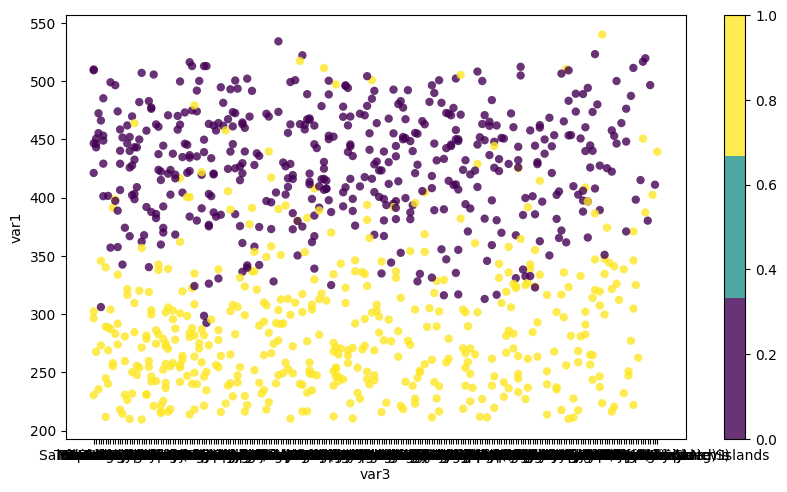

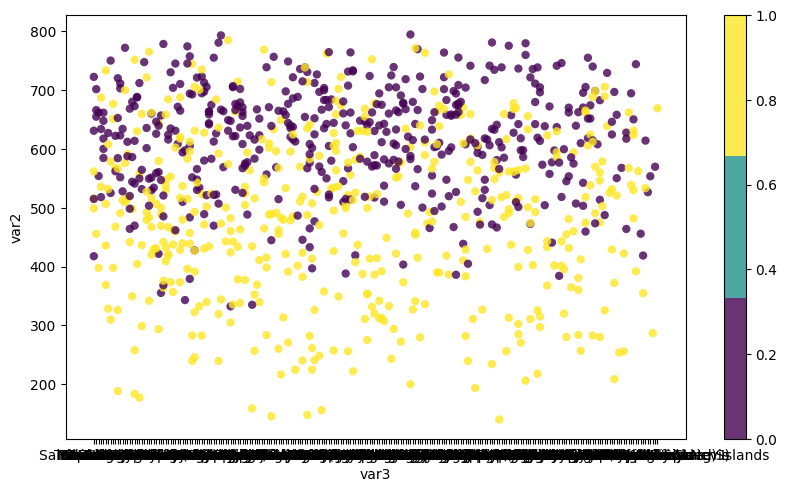

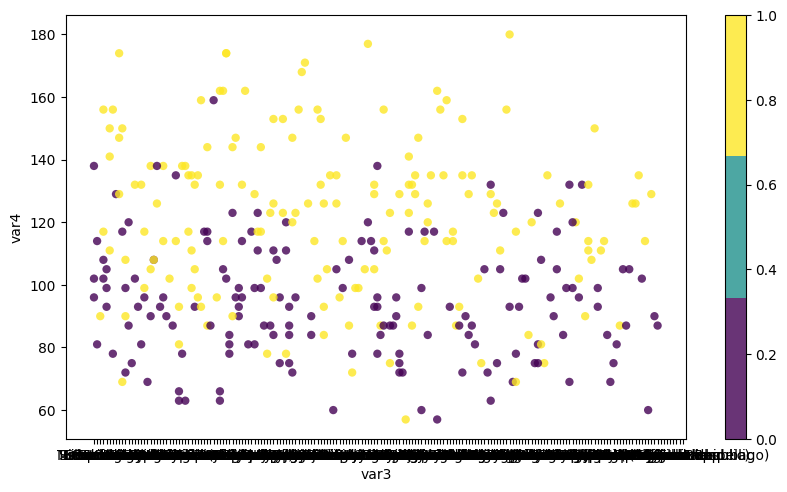

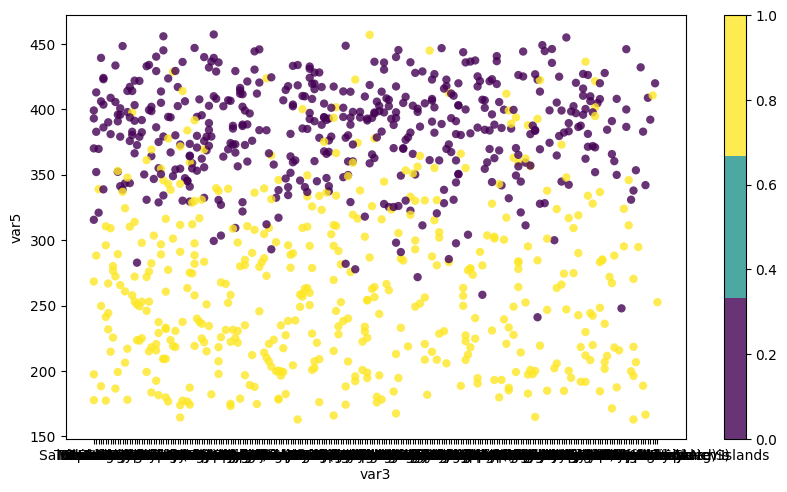

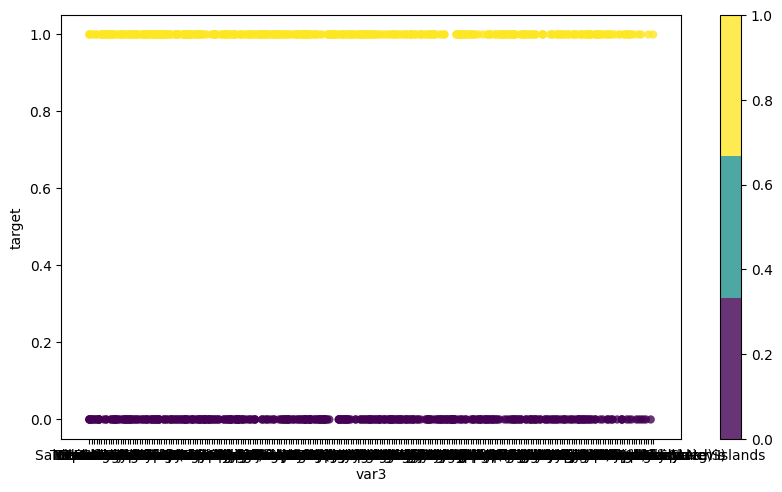

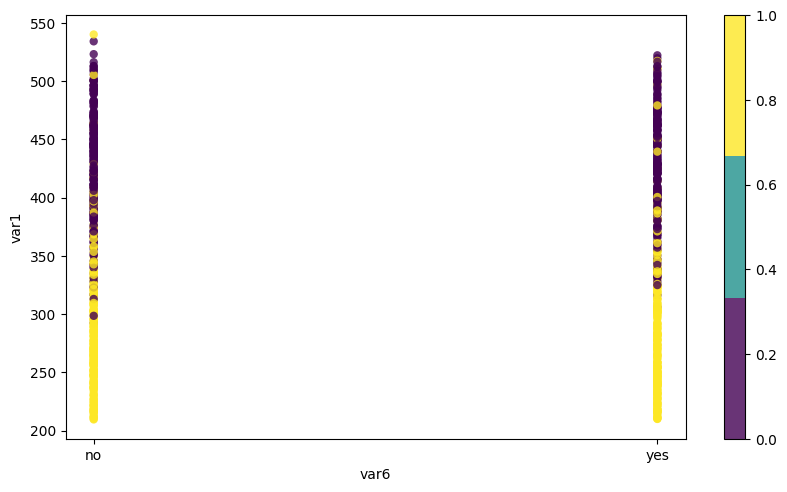

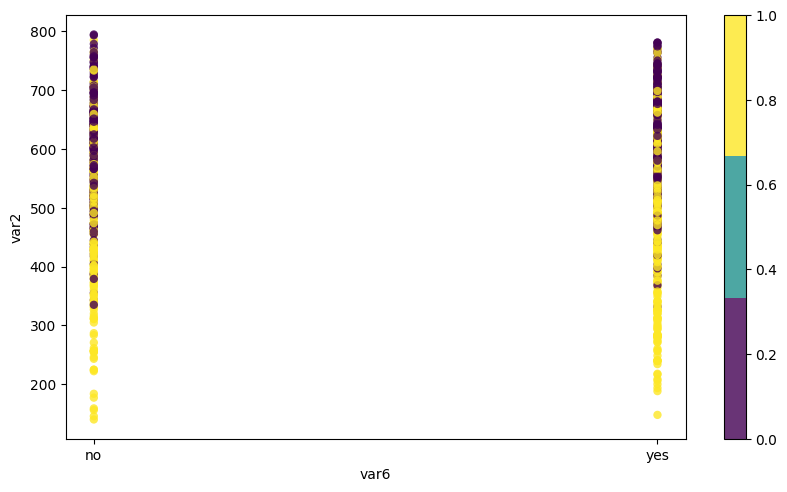

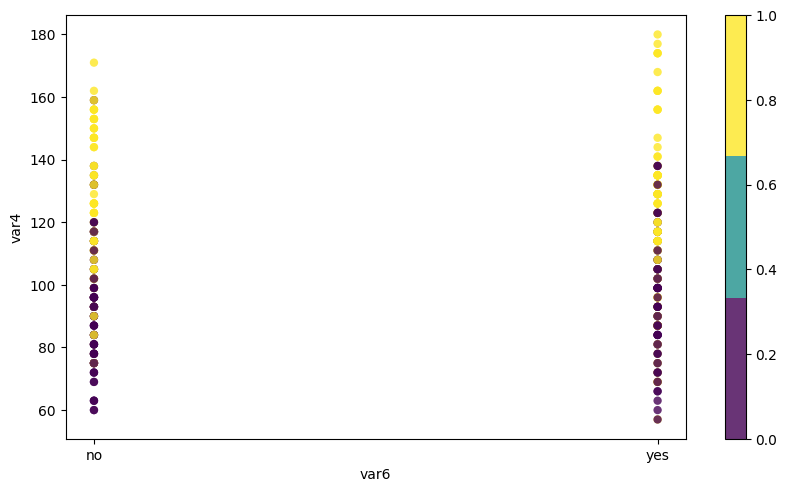

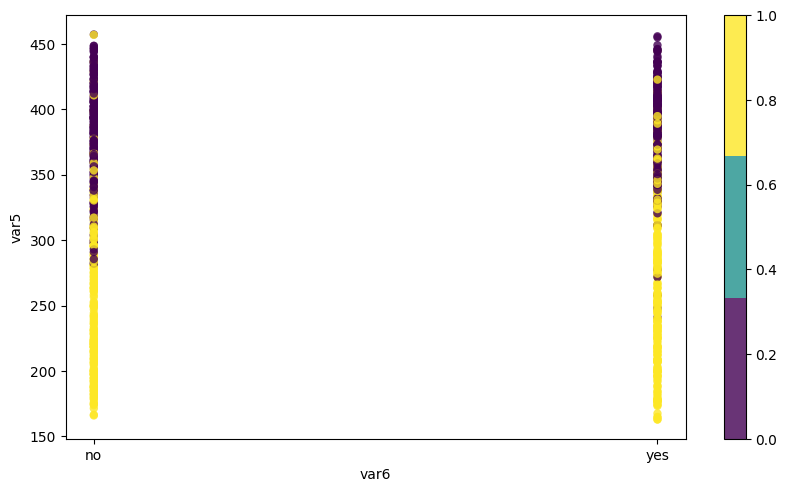

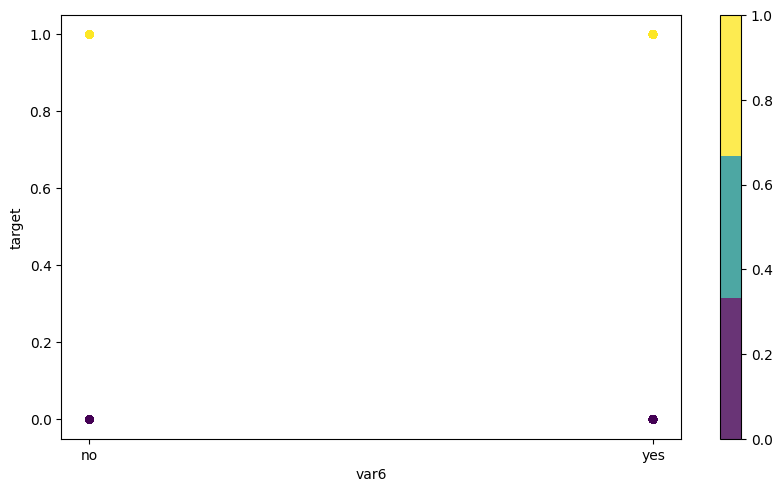

In [422]:
#Visualize our dataset, by plotting data in
# each column against the other
import matplotlib.pyplot as plt
x_axis = ["var3"]*5 + ["var6"]*5
y_axis = ["var1", "var2", "var4", "var5", "target","var1", "var2", "var4", "var5", "target", ]

for i in range(len(x_axis)):
    plt.scatter(
            df[x_axis[i]], df[y_axis[i]], c=df["target"],edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
        )

    plt.xlabel(x_axis[i])
    plt.ylabel(y_axis[i])
    plt.colorbar()
    plt.show()

# 1.1.1 Encoding Categorical Values

In [423]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer((OneHotEncoder(sparse=False), ['var3', 'var6']), remainder='passthrough')
transformed = transformer.fit_transform(df)
df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
trans_no_var4 = make_column_transformer((OneHotEncoder(sparse=False), ['var3', 'var6']), remainder='passthrough')
unknown = trans_no_var4.fit_transform(unknown)
unknown = pd.DataFrame(unknown,columns=trans_no_var4.get_feature_names_out() )

unknown.head()

,onehotencoder__var3_Afghanistan,onehotencoder__var3_Albania,onehotencoder__var3_Algeria,onehotencoder__var3_American Samoa,onehotencoder__var3_Angola,onehotencoder__var3_Anguilla,onehotencoder__var3_Antarctica (the territory South of 60 deg S),onehotencoder__var3_Antigua and Barbuda,onehotencoder__var3_Argentina,onehotencoder__var3_Armenia,...,onehotencoder__var3_Western Sahara,onehotencoder__var3_Yemen,onehotencoder__var3_Zambia,onehotencoder__var3_Zimbabwe,onehotencoder__var6_no,onehotencoder__var6_yes,remainder__target,remainder__var1,remainder__var2,remainder__var5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,304.98,492.700,444.85
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,302.36,515.935,177.75
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,261.68,386.454,412.45
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,317.60,155.983,323.15
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,465.08,606.384,421.45


In [424]:
#note new columns names
df.head()

,onehotencoder__var3_Afghanistan,onehotencoder__var3_Albania,onehotencoder__var3_Algeria,onehotencoder__var3_American Samoa,onehotencoder__var3_Andorra,onehotencoder__var3_Angola,onehotencoder__var3_Anguilla,onehotencoder__var3_Antarctica (the territory South of 60 deg S),onehotencoder__var3_Antigua and Barbuda,onehotencoder__var3_Argentina,...,onehotencoder__var3_Yemen,onehotencoder__var3_Zambia,onehotencoder__var3_Zimbabwe,onehotencoder__var6_no,onehotencoder__var6_yes,remainder__target,remainder__var1,remainder__var2,remainder__var4,remainder__var5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,509.18,417.681,138.0,393.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,446.06,666.182,81.0,352.05
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,235.50,398.097,90.0,339.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,306.02,518.163,102.0,439.25
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,453.08,600.156,105.0,422.95


# 1.1.2 Data imputation

In [425]:
#We now want to fill in the null values in var4 with as accurate values as possible

df.dropna(inplace=True)
#check correlation between the columns to see which features are important in the prediction of var4
corr_matrix = df.corr()
corr_matrix

,onehotencoder__var3_Afghanistan,onehotencoder__var3_Albania,onehotencoder__var3_Algeria,onehotencoder__var3_American Samoa,onehotencoder__var3_Andorra,onehotencoder__var3_Angola,onehotencoder__var3_Anguilla,onehotencoder__var3_Antarctica (the territory South of 60 deg S),onehotencoder__var3_Antigua and Barbuda,onehotencoder__var3_Argentina,...,onehotencoder__var3_Yemen,onehotencoder__var3_Zambia,onehotencoder__var3_Zimbabwe,onehotencoder__var6_no,onehotencoder__var6_yes,remainder__target,remainder__var1,remainder__var2,remainder__var4,remainder__var5
onehotencoder__var3_Afghanistan,1.000000,-0.004372,-0.008784,-0.004372,-0.006192,-0.006192,-0.004372,NaN,-0.004372,-0.004372,...,-0.004372,-0.006192,NaN,-0.075602,0.075602,-0.001211,0.057169,-0.066932,0.119889,0.001486
onehotencoder__var3_Albania,-0.004372,1.000000,-0.006202,-0.003086,-0.004372,-0.004372,-0.003086,NaN,-0.003086,-0.003086,...,-0.003086,-0.004372,NaN,0.057824,-0.057824,0.054707,-0.032894,-0.033363,-0.013637,-0.096857
onehotencoder__var3_Algeria,-0.008784,-0.006202,1.000000,-0.006202,-0.008784,-0.008784,-0.006202,NaN,-0.006202,-0.006202,...,-0.006202,-0.008784,NaN,-0.051391,0.051391,-0.001718,-0.012938,-0.063230,-0.068809,-0.016834
onehotencoder__var3_American Samoa,-0.004372,-0.003086,-0.006202,1.000000,-0.004372,-0.004372,-0.003086,NaN,-0.003086,-0.003086,...,-0.003086,-0.004372,NaN,-0.053376,0.053376,-0.056417,0.030998,-0.015224,-0.045341,0.082967
onehotencoder__var3_Andorra,-0.006192,-0.004372,-0.008784,-0.004372,1.000000,-0.006192,-0.004372,NaN,-0.004372,-0.004372,...,-0.004372,-0.006192,NaN,0.081902,-0.081902,0.077488,-0.011286,-0.044685,-0.055240,-0.071243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
remainder__target,-0.001211,0.054707,-0.001718,-0.056417,0.077488,-0.001211,-0.056417,NaN,0.054707,-0.056417,...,-0.056417,-0.001211,NaN,-0.076378,0.076378,1.000000,-0.798885,-0.481252,0.517783,-0.816266
remainder__var1,0.057169,-0.032894,-0.012938,0.030998,-0.011286,-0.061938,0.025149,NaN,-0.071512,0.092838,...,-0.011564,-0.005433,NaN,0.050456,-0.050456,-0.798885,1.000000,0.348974,-0.387306,0.557294
remainder__var2,-0.066932,-0.033363,-0.063230,-0.015224,-0.044685,0.042411,0.015037,NaN,-0.023337,-0.004979,...,0.075157,0.005134,NaN,0.025841,-0.025841,-0.481252,0.348974,1.000000,-0.243858,0.408089
remainder__var4,0.119889,-0.013637,-0.068809,-0.045341,-0.055240,0.003136,-0.077044,NaN,0.056110,-0.045341,...,-0.013637,-0.028297,NaN,-0.017938,0.017938,0.517783,-0.387306,-0.243858,1.000000,-0.385052


In [426]:
#chose columns that has high corr with var4
corr_matrix = corr_matrix.abs().sort_values(ascending=False, by='remainder__var4')
features = corr_matrix.loc[corr_matrix["remainder__var4"] >= 0.2].index.to_list()[1:]
features

['remainder__target', 'remainder__var1', 'remainder__var5', 'remainder__var2']

**1- LinearRegression**

In [427]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline

X = df[features]
y = df["remainder__var4"]
x_train, x_test, y_train, y_test = train_test_split(X, y)

model = make_pipeline(LinearRegression())
model.fit(x_train, y_train)
pred = model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 19.196097238679165
Mean Squared Error: 593.7105347685512
Root Mean Squared Error: 24.366176039102875


2- polynomial regression

In [428]:
from sklearn.preprocessing import PolynomialFeatures


for degree in range(2,5):
    x_train, x_test, y_train, y_test = train_test_split(X, y)

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    print(f"Errors of Polynomial Regression of {degree} degree")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print("\n")



Errors of Polynomial Regression of 2 degree
Mean Absolute Error: 16.502747993484697
Mean Squared Error: 503.12363077192083
Root Mean Squared Error: 22.430417534498122


Errors of Polynomial Regression of 3 degree
Mean Absolute Error: 15.746231369219903
Mean Squared Error: 599.0836441997544
Root Mean Squared Error: 24.476185246066315


Errors of Polynomial Regression of 4 degree
Mean Absolute Error: 24.88607286949734
Mean Squared Error: 1894.8368839187488
Root Mean Squared Error: 43.529724142460964




We noice that polynomial with second degree has least MSE, so we are gonna use it to predict missing values of var4

In [429]:
#renaming columns in unknown dataframe to match our main dataframe


model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model = model.fit(X, y)


new_var4_values = model.predict(unknown[features])


In [430]:
#appending new values to the dataset
unknown["remainder__var4"]= new_var4_values
unknown.head()
print(df.shape)
df = pd.concat([df,unknown])

(325, 243)


In [431]:

#some encoded features weren't in the unknown dataframe, so fill them with 0
df.fillna(0, inplace=True)
df.isna().sum()

onehotencoder__var3_Afghanistan       0
onehotencoder__var3_Albania           0
onehotencoder__var3_Algeria           0
onehotencoder__var3_American Samoa    0
onehotencoder__var3_Andorra           0
                                     ..
remainder__target                     0
remainder__var1                       0
remainder__var2                       0
remainder__var4                       0
remainder__var5                       0
Length: 243, dtype: int64

# 1.1.3 Implementing PCA

In [432]:
#https://github.com/AssemblyAI-Examples/Machine-Learning-From-Scratch/blob/main/07%20PCA/pca.py

import numpy as np


class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # covariance, functions needs samples as columns
        cov = np.cov(X.T)

        # eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T

        # sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs].real.astype(np.float32)

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)

Shape of X: (925, 242)
Shape of transformed X: (925, 2)


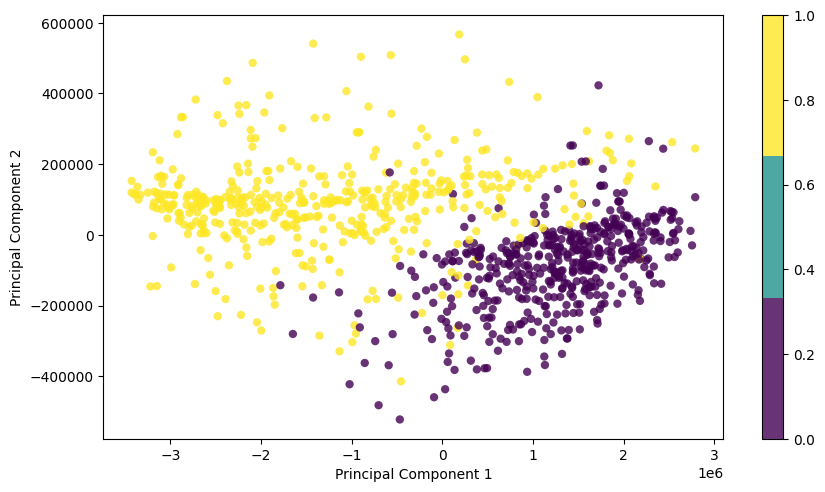

In [433]:
# visualizing with PCA
import matplotlib.pyplot as plt
from sklearn import datasets

    # data = datasets.load_digits()
# data = datasets.load_iris()
X = df.drop(["remainder__target"], axis=1)
y = df["remainder__target"]

# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

# 1.2 Training

In [434]:
models = {}

In [435]:
#select features with high correlation with target
corr_matrix = df.corr()
corr_matrix = corr_matrix.abs().sort_values(ascending=False, by='remainder__target')
features = corr_matrix.loc[corr_matrix["remainder__target"] >= 0.2].index.to_list()[1:]
features

['remainder__var1', 'remainder__var5', 'remainder__var4', 'remainder__var2']

In [436]:
#from lab
def calculate_vif(df, features):
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)

        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(df,features)

,VIF,Tolerance
remainder__var1,1.568506,0.637550
remainder__var5,1.484591,0.673586
remainder__var4,1.400594,0.713983
remainder__var2,1.207027,0.828482


In [437]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def training(model, features_mode, X, y, parameters, scaler=None):
    x_train, x_test, y_train, y_test = train_test_split(X, y)

    match features_mode:
        case "PCA":
            pca = PCA(2)
            pca.fit(x_train)
            x_train = pca.transform(x_train)
            x_test = pca.transform(x_test)
        case "features":
            x_train = x_train[features]
            x_test = x_test[features]

    if scaler is not None:
        scale = StandardScaler()
        x_train = scale.fit_transform(x_train)
        x_test = scale.transform(x_test)



    clf = GridSearchCV(estimator=model,param_grid=parameters, cv=3, scoring="f1")
    clf.fit(x_train, y_train)
    best_parameters = clf.best_params_
    pred = clf.predict(x_test)

    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_true=y_test, y_pred=pred)
    print(f"best parameters {best_parameters}")
    print(f"accuracy is {acc}")
    print(f"f1 score {f1}\n")
    return acc,f1


In [438]:
#Logistic regression

model = LogisticRegression()
param = { 'max_iter':[100, 500, 1000], 'C':[0.1, 0.5, 1, 5]}

#logstic regression no PCA no Scaling
print("logistic regression no PCA no Scaling")
acc, f1 = training(model=model, features_mode="features", X=df.drop(["remainder__target"], axis=1), y=df["remainder__target"], parameters=param)
models['LR'] = [acc,f1]


#logstic regression with PCA no Scaling
print("logistic regression with PCA no Scaling")
acc, f1 =training(model=model, features_mode="PCA", X=df.drop(["remainder__target"], axis=1), y=df["remainder__target"], parameters=param)
models['LR_PCA'] = [acc,f1]


#logstic regression no PCA with Scaling
print("logistic regression no PCA with Scaling")
acc, f1 =training(model=model, features_mode="features", X=df.drop(["remainder__target"], axis=1), y=df["remainder__target"], parameters=param, scaler=StandardScaler())
models['LR_Scaled'] = [acc,f1]


logistic regression no PCA no Scaling
best parameters {'C': 0.1, 'max_iter': 100}
accuracy is 0.9612068965517241
f1 score 0.9635627530364373

logistic regression with PCA no Scaling
best parameters {'C': 0.1, 'max_iter': 100}
accuracy is 0.9094827586206896
f1 score 0.9082969432314411

logistic regression no PCA with Scaling
best parameters {'C': 5, 'max_iter': 100}
accuracy is 0.9698275862068966
f1 score 0.9691629955947136



In [439]:
#KNN
model = KNeighborsClassifier()
param = {"n_neighbors": range(1,11), "weights": ["uniform", "distance"], "metric":['cosine', 'euclidean', 'manhattan'] }

#KNN no PCA no Scaling
print("KNN no PCA no Scaling")
acc, f1 =training(model=model, features_mode="features", X=df.drop(["remainder__target"], axis=1), y=df["remainder__target"], parameters=param)
models['KNN'] = [acc,f1]

#KNN with PCA no Scaling
print("KNN with PCA no Scaling")
acc, f1 =training(model=model, features_mode="PCA", X=df.drop(["remainder__target"], axis=1), y=df["remainder__target"], parameters=param)
models['KNN_PCA'] = [acc,f1]


#KNN no PCA with Scaling
print("KNN no PCA with Scaling")
acc, f1 =training(model=model, features_mode="features", X=df.drop(["remainder__target"], axis=1), y=df["remainder__target"], parameters=param, scaler=StandardScaler())
models["KNN_scaled"] = [acc,f1]


KNN no PCA no Scaling
best parameters {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
accuracy is 0.9655172413793104
f1 score 0.9652173913043479

KNN with PCA no Scaling
best parameters {'metric': 'cosine', 'n_neighbors': 5, 'weights': 'uniform'}
accuracy is 0.9094827586206896
f1 score 0.9049773755656109

KNN no PCA with Scaling
best parameters {'metric': 'cosine', 'n_neighbors': 8, 'weights': 'distance'}
accuracy is 0.9568965517241379
f1 score 0.9583333333333333



In [440]:
#Naive bayes

model = GaussianNB()
param = {"var_smoothing": [1e-9, 1e-5, 1e-12, 1e-3]}

#Naive Bayes no PCA no Scaling
print("Naive Bayes no PCA no Scaling")
acc, f1 =training(model=model, features_mode="features", X=df.drop(["remainder__target"], axis=1), y=df["remainder__target"], parameters=param)
models['NB'] = [acc,f1]

#Naive Bayes with PCA no Scaling
print("Naive Bayes with PCA no Scaling")
acc, f1 =training(model=model, features_mode="PCA", X=df.drop(["remainder__target"], axis=1), y=df["remainder__target"], parameters=param)
models['NB_PCA'] = [acc,f1]


#Naive Bayes no PCA with Scaling
print("Naive Bayes no PCA with Scaling")
acc, f1 =training(model=model, features_mode="features", X=df.drop(["remainder__target"], axis=1), y=df["remainder__target"], parameters=param, scaler=StandardScaler())
models['NB_scaled'] = [acc,f1]

Naive Bayes no PCA no Scaling
best parameters {'var_smoothing': 1e-09}
accuracy is 0.9396551724137931
f1 score 0.9396551724137931

Naive Bayes with PCA no Scaling
best parameters {'var_smoothing': 1e-09}
accuracy is 0.9181034482758621
f1 score 0.9124423963133641

Naive Bayes no PCA with Scaling
best parameters {'var_smoothing': 1e-09}
accuracy is 0.9698275862068966
f1 score 0.9694323144104804



# models performance

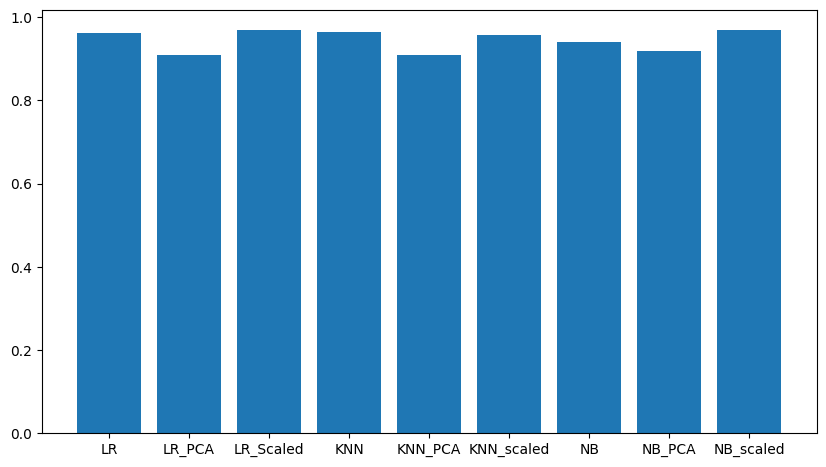

In [441]:
accuracy = [models[key][0] for key in models]
f1 = [models[key][1] for key in models]
model_names = [str(key) for key in models]
plt.rcParams["figure.figsize"] = (10,5.5)
ax = plt.bar(model_names,accuracy)
plt.show()

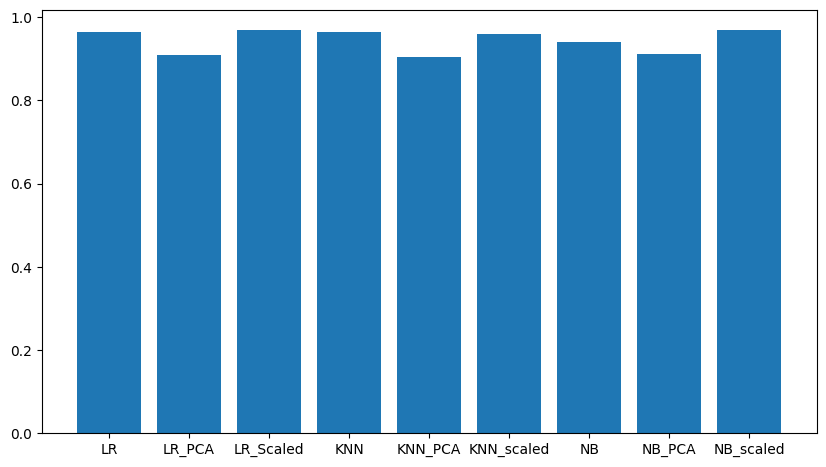

In [442]:
plt.rcParams["figure.figsize"] = (10,5.5)
ax = plt.bar(model_names,f1)
plt.show()

# Sources

1- labs
2- sklearn/matplotlib docs
3- https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
4- https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
5- https://www.youtube.com/watch?v=Rjr62b_h7S4
6- https://github.com./AssemblyAI-Examples/Machine-Learning-From-Scratch/blob/main/07%20PCA/pca.py
7- for cyclical encoding of var7 https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca